# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import statistics
from statistics import variance
from statistics import stdev
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
dataset1 = pd.merge(mouse_metadata,study_results, on="Mouse ID")
dataset1 = dataset1[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
# Display the data table for preview
dataset1.to_csv('mousedata.csv', index=False, header=True)


In [3]:
# Checking the number of mice.
Num_of_Mice = dataset1['Mouse ID'].unique()
#Num_of_Mice = dataset1['Mouse ID'].value_counts()
Num_of_Mice2 = sum(pd.value_counts(Num_of_Mice))
Num_of_Mice2

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mouse = dataset1[dataset1.duplicated(['Mouse ID', 'Timepoint'])]
unique_mouse = unique_mouse['Mouse ID'].unique()
unique_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = dataset1.loc[dataset1['Mouse ID'] == 'g989']
duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dataset2 = dataset1.drop(dataset1[dataset1['Mouse ID'] == 'g989'].index)
dataset2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [7]:
# Checking the number of mice in the clean DataFrame.
Num_of_Mice21 = dataset2['Mouse ID'].unique()
#Num_of_Mice = dataset1['Mouse ID'].value_counts()
Num_of_Mice22 = sum(pd.value_counts(Num_of_Mice21))
Num_of_Mice22

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

dataset3 = dataset2.sort_values(by='Drug Regimen',ascending=True)
dataset3


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
347,v923,30,40.752216,2,Capomulin,Female,19,21
358,g316,35,44.702833,2,Capomulin,Female,22,22
357,g316,30,44.221480,2,Capomulin,Female,22,22
356,g316,25,46.809225,1,Capomulin,Female,22,22
355,g316,20,45.933322,1,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
1324,o926,40,59.903044,3,Zoniferol,Male,15,29
1323,o926,35,58.593993,3,Zoniferol,Male,15,29
1322,o926,30,56.917398,3,Zoniferol,Male,15,29
591,b313,15,49.188387,1,Zoniferol,Male,12,27


In [9]:
#Groupby then summary stats / Calculating Mean categorized by drug type
Mean_TV = dataset3.groupby(['Drug Regimen']).mean(['Tumor Volume (mm3)'])
Mean_TV = Mean_TV.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})
Mean_TV = Mean_TV.drop(columns={'Timepoint','Metastatic Sites', 'Age_months', 'Weight (g)'})
Mean_TV
#Median Tumor Volume
Median_TV = dataset3.groupby(['Drug Regimen']).median(['Tumor Volume (mm3)'])
Median_TV = Median_TV.rename(columns={'Tumor Volume (mm3)':'Median Tumor Volume'})
Median_TV = Median_TV.drop(columns={'Timepoint','Metastatic Sites', 'Age_months', 'Weight (g)'})
Median_TV

,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [10]:
#Tumor Volume Variance
Variance_TV = dataset3.groupby(['Drug Regimen'])
#Variance_TV = float(Variance_TV['Tumor Volume (mm3)']) #Variance_TV.var(['Tumor Volume (mm3)'])
Variance_TV

dataset4 = dataset3['Drug Regimen'].unique().tolist()
dataset4
#Getting the variance for each type of drug regimen
#if drug regimen = x, then take Tumor Volume and add to specific drug regimen list
Drug_Regimen = dataset3['Drug Regimen'].unique().tolist()
Drug_Regimen

#Volume list for drugs
Capomulin_volumes = []
Ceftamin_volumes = []
Infubinol_volumes = []
Ketapril_volumes = []
Naftisol_volumes = []
Placebo_volumes = []
Propriva_volumes = []
Ramicane_volumes = []
Stelasyn_volumes = []
Zoniferol_volumes = []

for index, row in dataset3.iterrows():
    current_drug = row['Drug Regimen']
    
     # Check if the current drug is 'Capomulin'
    if current_drug == 'Capomulin':
        # If 'Capomulin', add the volume to the list
        Capomulin_volumes.append(row['Tumor Volume (mm3)'])
    
    if current_drug == 'Ceftamin':
        # If 'Capomulin', add the volume to the list
        Ceftamin_volumes.append(row['Tumor Volume (mm3)'])

    if current_drug == 'Infubinol':
        # If 'Capomulin', add the volume to the list
        Infubinol_volumes.append(row['Tumor Volume (mm3)'])

    if current_drug == 'Ketapril':
        # If 'Capomulin', add the volume to the list
        Ketapril_volumes.append(row['Tumor Volume (mm3)'])

    if current_drug == 'Naftisol':
        # If 'Capomulin', add the volume to the list
        Naftisol_volumes.append(row['Tumor Volume (mm3)'])

    if current_drug == 'Placebo':
        # If 'Capomulin', add the volume to the list
        Placebo_volumes.append(row['Tumor Volume (mm3)'])

    if current_drug == 'Propriva':
        # If 'Capomulin', add the volume to the list
        Propriva_volumes.append(row['Tumor Volume (mm3)'])

    if current_drug == 'Ramicane':
        # If 'Capomulin', add the volume to the list
        Ramicane_volumes.append(row['Tumor Volume (mm3)'])

    if current_drug == 'Stelasyn':
        # If 'Capomulin', add the volume to the list
        Stelasyn_volumes.append(row['Tumor Volume (mm3)'])

    if current_drug == 'Zoniferol':
        # If 'Capomulin', add the volume to the list
        Zoniferol_volumes.append(row['Tumor Volume (mm3)'])

# # Print the volumes of Capomulin
# print("Capomulin Volumes:", Capomulin_volumes)

Capomulin_volumes_v = variance(Capomulin_volumes)
Ceftamin_volumes_v = variance(Ceftamin_volumes)
Infubinol_volumes_v = variance(Infubinol_volumes)
Ketapril_volumes_v = variance(Ketapril_volumes)
Naftisol_volumes_v = variance(Naftisol_volumes)
Placebo_volumes_v = variance(Placebo_volumes)
Propriva_volumes_v = variance(Propriva_volumes)
Ramicane_volumes_v = variance(Ramicane_volumes)
Stelasyn_volumes_v = variance(Stelasyn_volumes)
Zoniferol_volumes_v = variance(Zoniferol_volumes)

Tumor_VV = [[Capomulin_volumes_v, Ceftamin_volumes_v, Infubinol_volumes_v,
              Ketapril_volumes_v, Naftisol_volumes_v, Placebo_volumes_v,
                Propriva_volumes_v, Ramicane_volumes_v, Stelasyn_volumes_v,
                  Zoniferol_volumes_v], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
                                         'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]


In [11]:
#Tumor_VV
Tumor_V_df = pd.DataFrame(Tumor_VV).transpose()
Tumor_V_df.columns = ['Tumor Volume Variance', 'Drug Regimen']
print((Tumor_V_df))
# df_tumor = pd.DataFrame(Tumor_VV, columns= ['Tumor Volume Variance'])
# df_tumor = 

  Tumor Volume Variance Drug Regimen
0             24.947764    Capomulin
1             39.290177     Ceftamin
2             43.128684    Infubinol
3             68.553577     Ketapril
4             66.173479     Naftisol
5             61.168083      Placebo
6             43.852013     Propriva
7             23.486704     Ramicane
8             59.450562     Stelasyn
9             48.533355    Zoniferol


In [12]:
#Standard Deviation of : 
print("Variance of Capomulin:", stdev(Capomulin_volumes))
print("Variance of Ceftamin:", stdev(Ceftamin_volumes))
print("Variance of Infubinol:", stdev(Infubinol_volumes))
print("Variance of Ketapril:", stdev(Ketapril_volumes))
print("Variance of Naftisol:", stdev(Naftisol_volumes))
print("Variance of Placebo:", stdev(Placebo_volumes))
print("Variance of Propriva:", stdev(Propriva_volumes))
print("Variance of Ramicane:", stdev(Ramicane_volumes))
print("Variance of Stelasyn:", stdev(Stelasyn_volumes))
print("Variance of Zoniferol:", stdev(Zoniferol_volumes))

Capomulin_volumes_sd = stdev(Capomulin_volumes)
Ceftamin_volumes_sd = stdev(Ceftamin_volumes)
Infubinol_volumes_sd = stdev(Infubinol_volumes)
Ketapril_volumes_sd = stdev(Ketapril_volumes)
Naftisol_volumes_sd = stdev(Naftisol_volumes)
Placebo_volumes_sd = stdev(Placebo_volumes)
Propriva_volumes_sd = stdev(Propriva_volumes)
Ramicane_volumes_sd = stdev(Ramicane_volumes)
Stelasyn_volumes_sd = stdev(Stelasyn_volumes)
Zoniferol_volumes_sd = stdev(Zoniferol_volumes)

Tumor_sd = [[Capomulin_volumes_sd, Ceftamin_volumes_sd, Infubinol_volumes_sd,
              Ketapril_volumes_sd, Naftisol_volumes_sd, Placebo_volumes_sd,
                Propriva_volumes_sd, Ramicane_volumes_sd, Stelasyn_volumes_sd,
                  Zoniferol_volumes_sd], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
                                         'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]
Tumor_sd_df = pd.DataFrame(Tumor_sd).transpose()
Tumor_sd_df.columns = ['Tumor Volume Std. Dev.', 'Drug Regimen']
print((Tumor_sd_df))
#Standard error of the mean
print("Variance of Capomulin:", sem(Capomulin_volumes))
print("Variance of Ceftamin:", sem(Ceftamin_volumes))
print("Variance of Infubinol:", sem(Infubinol_volumes))
print("Variance of Ketapril:", sem(Ketapril_volumes))
print("Variance of Naftisol:", sem(Naftisol_volumes))
print("Variance of Placebo:", sem(Placebo_volumes))
print("Variance of Propriva:", sem(Propriva_volumes))
print("Variance of Ramicane:", sem(Ramicane_volumes))
print("Variance of Stelasyn:", sem(Stelasyn_volumes))
print("Variance of Zoniferol:", sem(Zoniferol_volumes))

Capomulin_volumes_sem = sem(Capomulin_volumes)
Ceftamin_volumes_sem = sem(Ceftamin_volumes)
Infubinol_volumes_sem = sem(Infubinol_volumes)
Ketapril_volumes_sem = sem(Ketapril_volumes)
Naftisol_volumes_sem = sem(Naftisol_volumes)
Placebo_volumes_sem = sem(Placebo_volumes)
Propriva_volumes_sem = sem(Propriva_volumes)
Ramicane_volumes_sem = sem(Ramicane_volumes)
Stelasyn_volumes_sem = sem(Stelasyn_volumes)
Zoniferol_volumes_sem = sem(Zoniferol_volumes)

Tumor_sem = [[Capomulin_volumes_sem, Ceftamin_volumes_sem, Infubinol_volumes_sem,
              Ketapril_volumes_sem, Naftisol_volumes_sem, Placebo_volumes_sem,
                Propriva_volumes_sem, Ramicane_volumes_sem, Stelasyn_volumes_sem,
                  Zoniferol_volumes_sem], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
                                         'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']]
Tumor_sem_df = pd.DataFrame(Tumor_sem).transpose()
Tumor_sem_df.columns = ['Tumor Volume Std. Err.', 'Drug Regimen']
print((Tumor_sem_df))

Variance of Capomulin: 4.9947736805840215
Variance of Ceftamin: 6.2681877184141985
Variance of Infubinol: 6.5672432670669405
Variance of Ketapril: 8.279708757706759
Variance of Naftisol: 8.134708291473338
Variance of Placebo: 7.821002681031188
Variance of Propriva: 6.622085246583617
Variance of Ramicane: 4.846308280753017
Variance of Stelasyn: 7.7104190335782645
Variance of Zoniferol: 6.966588504381904
  Tumor Volume Std. Dev. Drug Regimen
0               4.994774    Capomulin
1               6.268188     Ceftamin
2               6.567243    Infubinol
3               8.279709     Ketapril
4               8.134708     Naftisol
5               7.821003      Placebo
6               6.622085     Propriva
7               4.846308     Ramicane
8               7.710419     Stelasyn
9               6.966589    Zoniferol
Variance of Capomulin: 0.32934562340083096
Variance of Ceftamin: 0.46982053275261093
Variance of Infubinol: 0.49223569380113824
Variance of Ketapril: 0.6038598237739697
Varianc

In [13]:
#Merging the data
merged_df = pd.merge(Mean_TV,Median_TV, on="Drug Regimen")
merged_df = pd.merge(merged_df,Tumor_V_df, on="Drug Regimen")
merged_df = pd.merge(merged_df,Tumor_sd_df, on="Drug Regimen")
merged_df = pd.merge(merged_df,Tumor_sem_df, on="Drug Regimen")
merged_df = merged_df.set_index('Drug Regimen')
merged_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.60386
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
dataset3a = dataset3
# Using the aggregation method, produce the same summary statistics in a single line
dataset3a = dataset3a.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(["mean","median","var","std","sem"])
dataset3a



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

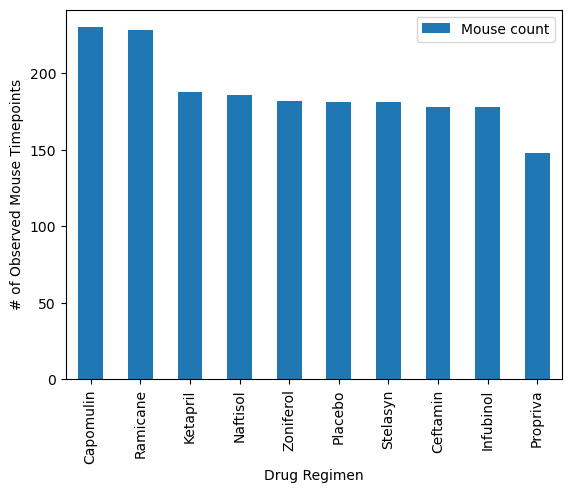

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bp = dataset3['Drug Regimen'].value_counts().reset_index()
bp.columns = ['Drug Regimen', 'Mouse count']
# sorted(bp)
plot1 = bp.plot.bar(x='Drug Regimen', y='Mouse count', rot=90)
plot1.set_ylabel("# of Observed Mouse Timepoints")
plot1.plot(figsize =(8,8))
plot1

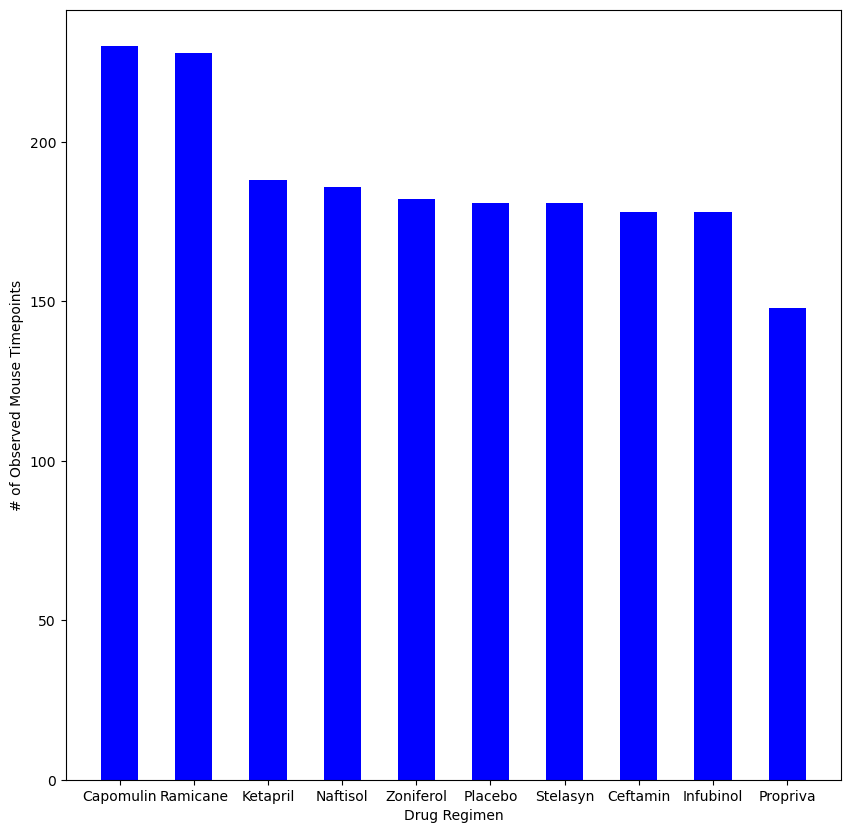

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig = plt.figure(figsize = (10,10))
plt.bar(bp['Drug Regimen'], bp['Mouse count'], color = 'b', width = 0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [17]:
#Grouping female and males
gender = dataset3['Sex'].value_counts()
gender


Sex
Male      958
Female    922
Name: count, dtype: int64

In [18]:
#using iloc
print("Female count " + str(gender.iloc[1]))
print("Male count " + str(gender.iloc[0]))

Female count 922
Male count 958


In [19]:
#Gathering percentages
sum_gender = sum(dataset3['Sex'].value_counts())
male_perc =  round(gender.iloc[0] / sum_gender * 100, 0)
female_percentage = round(gender.iloc[1] / sum_gender * 100,0)

In [20]:
#Creating pie plot data
gender_plot = pd.DataFrame({'Male': [male_perc],
                            'Female': [female_percentage]})
gender_plot = gender_plot.transpose()
gender_plot.index.name = 'Gender'
gender_plot



,0
Gender,
Male,51.0
Female,49.0


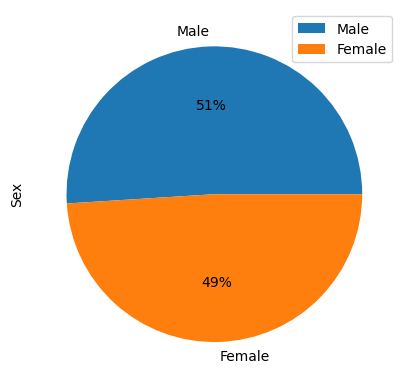

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = gender_plot.plot(kind="pie",subplots=True, autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

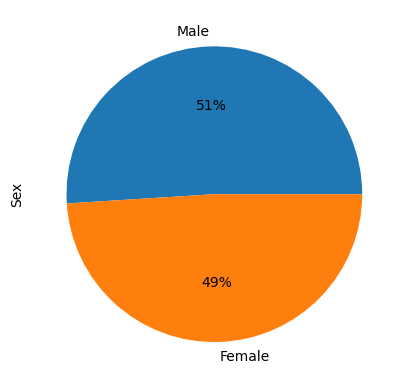

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot.columns = ["Percentage"]
mylabels = gender_plot.index
gp2 = plt.pie(gender_plot['Percentage'],labels = mylabels, autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Final_tp_mouse2 = dataset2.groupby('Mouse ID')['Timepoint'].max()
Final_tp_mouse2 = Final_tp_mouse2.to_frame(name="Timepoint")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_tp_mouse3 = pd.merge(Final_tp_mouse2, dataset2, how='left', left_on=['Mouse ID','Timepoint'],right_on=['Mouse ID','Timepoint'])
Final_tp_mouse3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
#Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# # Create empty list to store IQR values for each treatment
iqr_values = []

#Store outliers
outliers1 = []

# # For loop list of treatments
for treatment in treatments_list:
    final_treatment = Final_tp_mouse3.loc[Final_tp_mouse3['Drug Regimen'] == treatment]
    tumor_volume_list.append(final_treatment['Tumor Volume (mm3)'])
    tumor_volume_check = final_treatment['Tumor Volume (mm3)']

#Calculate the IQR for the current treatment
    quartiles = tumor_volume_check.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
# Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

# Identify potential outliers
    outliers = tumor_volume_check[(tumor_volume_check < lower_bound) | (tumor_volume_check > upper_bound)]
    outliers1.append(f"{treatment}'s potential outliers: {outliers} ")
    
print(*outliers1, sep = "\n")




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 


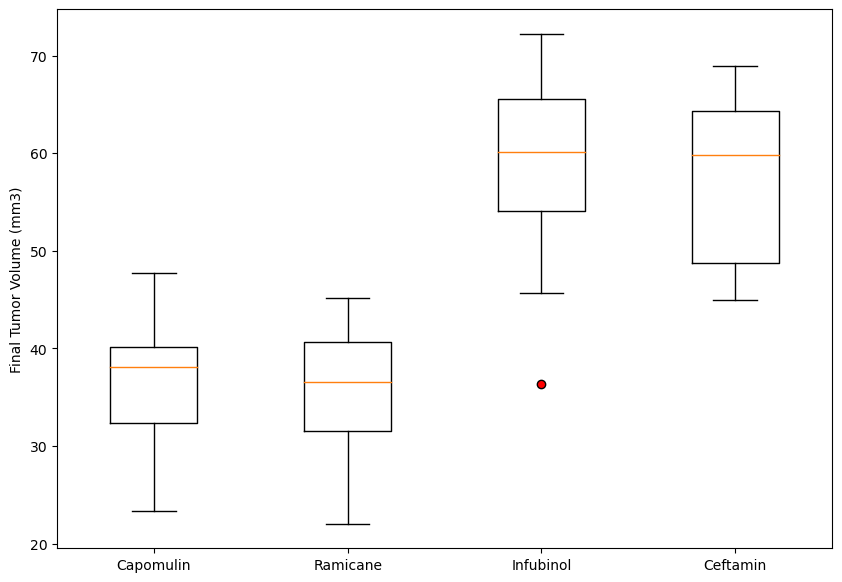

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize =(10, 7))

# Creating plot
bp = ax.boxplot(tumor_volume_list, labels=treatments_list, flierprops = dict(marker = "o", markerfacecolor = "red"))

# Add a title and labels to the plot
ax.set_ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

In [26]:
Capo_mouse1 = dataset1.loc[dataset1['Mouse ID'] == "s185"]
Capo_mouse1
                                    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
10,s185,0,45.000000,0,Capomulin,Female,3,17
11,s185,5,43.878496,0,Capomulin,Female,3,17
12,s185,10,37.614948,0,Capomulin,Female,3,17
13,s185,15,38.177232,0,Capomulin,Female,3,17
14,s185,20,36.866876,0,Capomulin,Female,3,17
15,s185,25,33.949940,0,Capomulin,Female,3,17
16,s185,30,32.959671,1,Capomulin,Female,3,17
17,s185,35,28.328531,1,Capomulin,Female,3,17
18,s185,40,25.472143,1,Capomulin,Female,3,17
19,s185,45,23.343598,1,Capomulin,Female,3,17


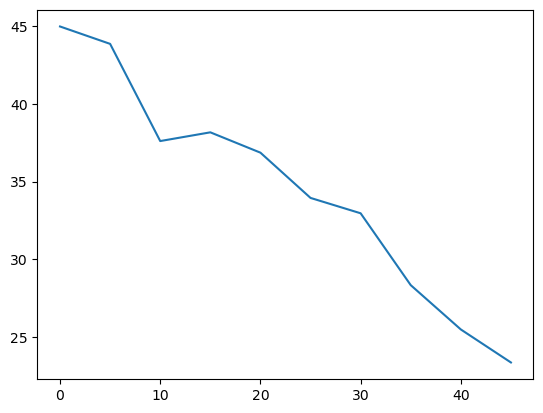

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line = plt.plot(Capo_mouse1['Timepoint'], Capo_mouse1['Tumor Volume (mm3)'])
plt.show()

In [28]:
average_observed_TV_Capo = dataset1.loc[dataset1['Drug Regimen']=="Capomulin"]
average_observed_TV_Capo = average_observed_TV_Capo.groupby('Mouse ID').mean('Tumor Volume (mm3)')
average_observed_TV_Capo

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


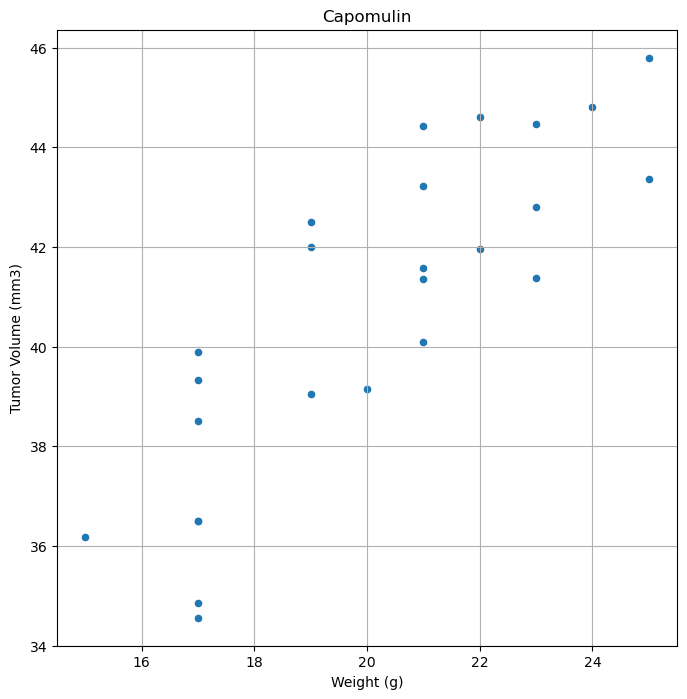

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_observed_TV_Capo.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin")
plt.show()

## Correlation and Regression

In [30]:
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is 0.84


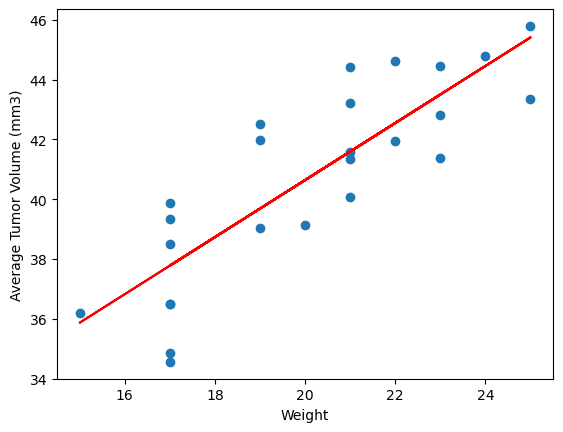

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = average_observed_TV_Capo['Weight (g)']
y_values = average_observed_TV_Capo["Tumor Volume (mm3)"]

#calculating correlation coefficient
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#printing correlation line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()